# Feature Engineering and Feature Selection

- **feature engineering**: This process attempts to create additional relevant features from the existing raw features in the data, and to increase predictive power to the learning algorithm.
- **feature selection**: This process selects the key subset of original data features in an attempt to reduce the dimensionality of the training problem.

In [1]:
churn_prep_df = spark.read.format("delta").load("Tables/churn_prep").cache().toPandas()

StatementMeta(, 091c8a18-f1be-473f-b25d-d26c4550f0f9, 3, Finished, Available, Finished)

The following feature engineering generates new attributes from the existing attributes.
- By considering the ratio of how long a customer has been with a company relative to their age, you can gain insights into customer behavior and this ratio can provide insights into the distribution of tenure relative to age and help identify any interesting patterns or outliers in the data.
- qcut is a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

### Derive new features

In [2]:
import pandas as pd

churn_prep_df["NewTenure"] = churn_prep_df["Tenure"]/churn_prep_df["Age"]
churn_prep_df["NewCreditsScore"] = pd.qcut(churn_prep_df['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
churn_prep_df["NewAgeScore"] = pd.qcut(churn_prep_df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
churn_prep_df["NewBalanceScore"] = pd.qcut(churn_prep_df['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
churn_prep_df["NewEstSalaryScore"] = pd.qcut(churn_prep_df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

StatementMeta(, 091c8a18-f1be-473f-b25d-d26c4550f0f9, 4, Finished, Available, Finished)

### Perform One-Hot Encoding

In [4]:
churn_prep_df = pd.get_dummies(churn_prep_df, columns=['Geography', 'Gender'])

StatementMeta(, 091c8a18-f1be-473f-b25d-d26c4550f0f9, 6, Finished, Available, Finished)

### Visualize new features

StatementMeta(, 091c8a18-f1be-473f-b25d-d26c4550f0f9, 8, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

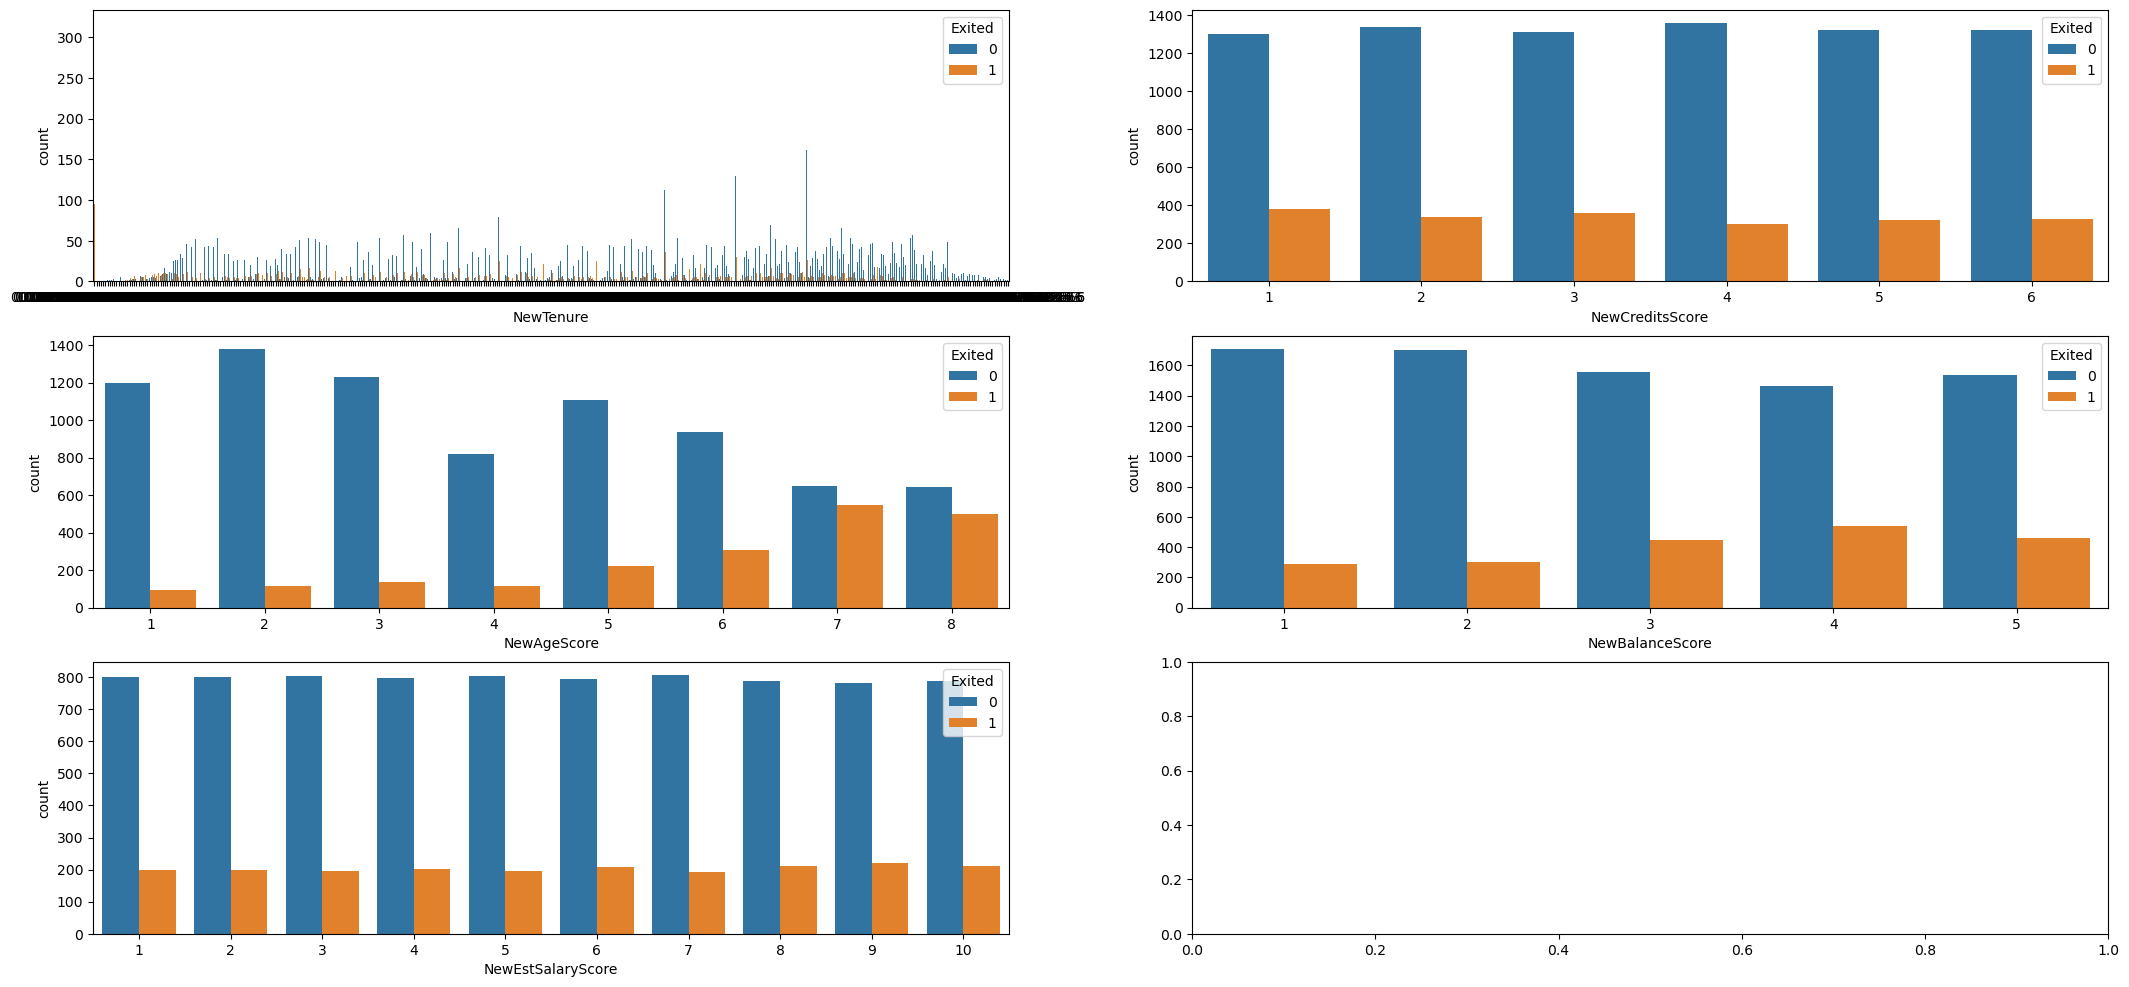

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

derived_features = ["NewTenure", "NewCreditsScore", "NewAgeScore", "NewBalanceScore", "NewEstSalaryScore"]  

fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(26,12))
for col,subplot in zip(derived_features, ax.flatten()):
    sns.countplot(x = churn_prep_df[col], hue=churn_prep_df.Exited.astype(str), ax=subplot)


### Save feature ready file for next steps

In [8]:
# spark.conf.set("sprk.sql.parquet.vorder.enabled", "true") # VOrder write is enabled by default
# spark.conf.set("spark.microsoft.delta.optimizeWrite.enabled", "true") # automatic delta optimized write is enabled by default

spark_df = spark.createDataFrame(churn_prep_df)

table_name = "churn_feat_ready"
spark_df.write.mode("overwrite").format("delta").save(f"Tables/{table_name}")
print(f"Spark dataframe saved to delta table: {table_name}")

StatementMeta(, 091c8a18-f1be-473f-b25d-d26c4550f0f9, 10, Finished, Available, Finished)

Spark dataframe saved to delta table: churn_feat_ready
